# 今日任务：数据聚类 Ⅰ

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# 超参数
cmap = plt.colormaps['tab10']

def plot_clusters(X, y, n_clusters=2):
    """
    绘制整个 cluster 可视化，并输出 ACC, NMI, ARI
    """
    # 创建 K-Means 聚类模型
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    
    # 预测聚类标签
    y_kmeans = kmeans.predict(X)
    
    # == 可视化结果 ==
    # 绘制原始数据
    plt.figure(figsize=(4, 4))
    for i in range(n_clusters):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], color=cmap(i), label=f'Cluster {i}')
    plt.title("Original Data")
    plt.legend(loc='best')
    # 限制显示范围
    plt.show()
    # 绘制聚类后的结果
    plt.figure(figsize=(4, 4))
    for i in range(n_clusters):
        plt.scatter(X[y_kmeans == i][:, 0], X[y_kmeans == i][:, 1], color=cmap(i), label=f'Cluster {i}')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=100, label='Centroids') # 绘制 K-Means 聚类中心
    plt.title("K-Means Clustering Data")
    plt.legend(loc='best')
    plt.show()
    
    # 计算 ACC, NMI, ARI
    acc = np.mean(y_kmeans == y)
    nmi = normalized_mutual_info_score(y, y_kmeans)
    ari = adjusted_rand_score(y, y_kmeans)
    print(f"ACC: {acc * 100:.2f}%, NMI: {nmi:.4f}, ARI: {ari:.4f}")

---
1. sklearn 中的 make_circles 方法生成数据，用 K-Means 聚类并可视化。

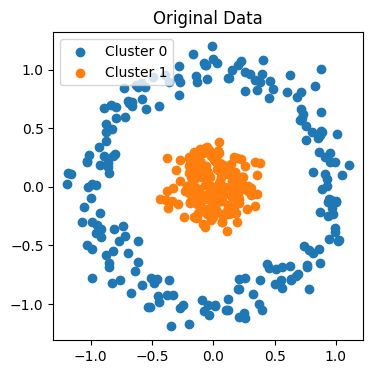

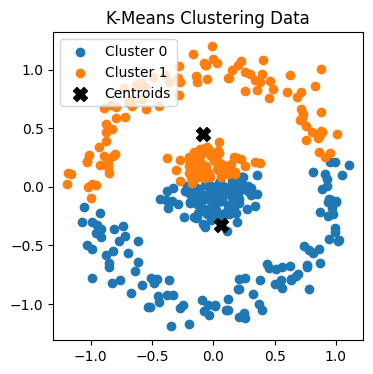

ACC: 44.50%, NMI: 0.0091, ARI: 0.0097


In [2]:

from sklearn.datasets import make_circles

# 生成数据
circles_X, circles_y = make_circles(n_samples=400, noise=0.1, factor=0.2)

# 绘制数据
plot_clusters(circles_X, circles_y)

---
2. sklearn 中的 make_moons 方法生成数据，用 K-Means 聚类并可视化。

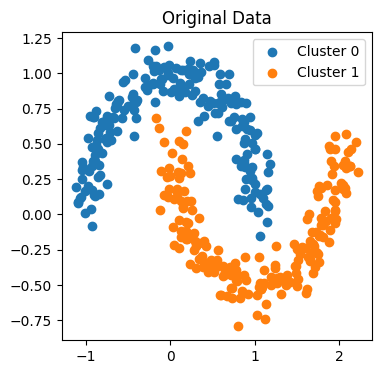

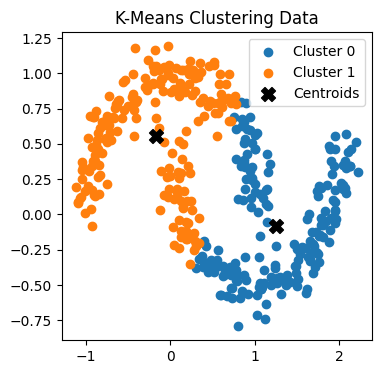

ACC: 25.50%, NMI: 0.1812, ARI: 0.2382


In [3]:

from sklearn.datasets import make_moons

# 生成数据
circles_X, circles_y = make_moons(n_samples=400, noise=0.1)

# 绘制数据
plot_clusters(circles_X, circles_y)

---
3. sklearn 中的 make_blobs 方法生成数据，用 K-Means 聚类并可视化。

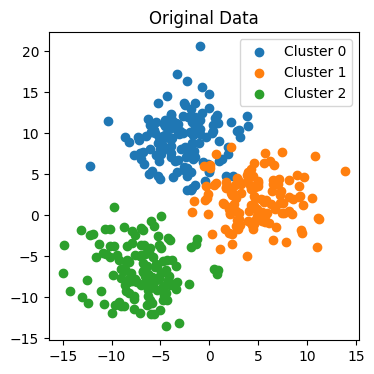

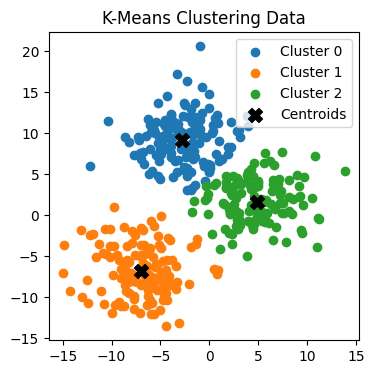

ACC: 32.50%, NMI: 0.9106, ARI: 0.9344


In [4]:

from sklearn.datasets import make_blobs

# 生成数据
blobs_X, blobs_y = make_blobs(n_samples=400, centers=3, cluster_std=3, random_state=42)

# 绘制数据
plot_clusters(blobs_X, blobs_y, n_clusters=3)